## Evaluate topic models: visualize topics
- **Note**: Only one model can be loaded at a time. Kernel crashes otherwise.

In [1]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [2]:
from usrightmedia.shared.topics_utils import *

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/nltk/decorators.py:69: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  signature = inspect.formatargspec(regargs, varargs, varkwargs, defaults,
/home/jovyan/.local/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/gensim/models/doc2vec.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import namedtuple, defaultdict, Iterable


### 1. compare coherence values to select models

In [3]:
json_file = os.path.join(MODELS_DIR, "coherence_c_v_summary", "coherence_c_v_summary.jsonl")

coherence_dicts = []
if json_file and os.path.exists(json_file):
    with open(file=json_file, mode="r", encoding="utf-8") as file:
        for line in file:
            coherence_dicts.append(json.loads(line))

In [4]:
summary = pd.DataFrame(coherence_dicts).sort_values("coherence_score_c_v", ascending=False).reset_index(drop=True)
summary

,model_name,corpus_type,docs_type,model_group,n_topics,coherence_score_c_v
0,lda_corpus_tfidf_docs_texts_topics_10,tfidf,texts,texts_tfidf,10,0.634486
1,lda_corpus_tfidf_docs_texts_topics_25,tfidf,texts,texts_tfidf,25,0.592699
2,lda_corpus_tfidf_docs_texts_topics_40,tfidf,texts,texts_tfidf,40,0.591731
3,lda_corpus_count_docs_texts_topics_45,count,texts,texts_count,45,0.591341
4,lda_corpus_tfidf_docs_texts_topics_30,tfidf,texts,texts_tfidf,30,0.590476
5,lda_corpus_count_docs_leads_topics_35,count,leads,leads_count,35,0.589930
6,lda_corpus_tfidf_docs_titles_topics_50,tfidf,titles,titles_tfidf,50,0.587383
7,lda_corpus_tfidf_docs_texts_topics_35,tfidf,texts,texts_tfidf,35,0.586838
8,lda_corpus_count_docs_leads_topics_40,count,leads,leads_count,40,0.585418
9,lda_corpus_count_docs_leads_topics_45,count,leads,leads_count,45,0.582440


/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/envs/usrightmedia/lib/python3

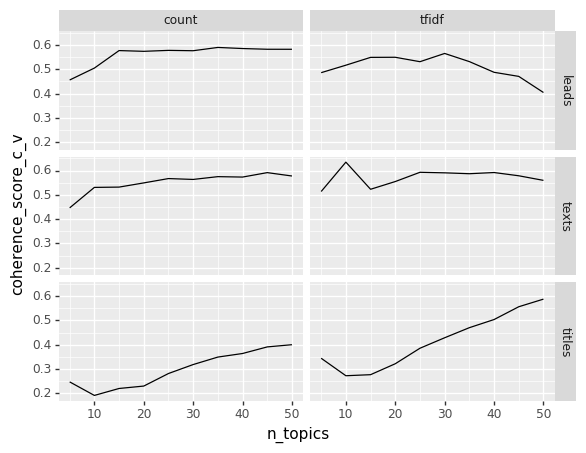

<ggplot: (8743216396285)>

In [5]:
(p9.ggplot(summary, p9.aes(x='n_topics', y='coherence_score_c_v'))
+ p9.geom_line(stat='identity')
+ p9.facet_grid('docs_type ~ corpus_type'))

### 2. load selected models

In [6]:
def load_model(corpus_type, docs_type, n_topics):
    """Load files related to model.
    
    Args:
        corpus_type (str): "count", "tfidf"
        docs_type (str): "leads", "texts", "titles"
        n_topics (int): number of topics
    
    Returns:
        d (dict): dictionary with the following keys...
            - name (str)
            - model (gensim LDA model)
            - dictionary (gensim dictionary)
            - corpus (gensim corpus)
            - docs (list)
            - vis (obj): pyLDAvis visualization of model's topics
            - df_topics (dataframe): top topic per document
    
    """

    d = {}
    
    model_name = f"lda_corpus_{corpus_type}_docs_{docs_type}_topics_{n_topics}"
    d['name'] = model_name
    d['model'] = LdaModel.load(os.path.join(MODELS_DIR, model_name, f"{model_name}.model"))
    
    inputs = load_inputs(corpus_type, docs_type, INPUTS_DIR)
    d['dictionary'] = inputs['dictionary']
    d['corpus'] = inputs['corpus']
    d['docs'] = inputs["docs"]
    
    # pyLDAvis' topic numbers won't automatically match gensim's topic numbers because pyLDAvis sorts topics by topic proportion
    # "sort_topics: sort topics by topic proportion (percentage of tokens covered)."
    # Set to false to to keep original topic order.
    # NOTE: pyLDAvis starts numbering from 1 vs. gensim which starts numbering from 0; i.e., pyLDAvis topic IDs equals gensim topic IDs + 1
    d['vis'] = gensimvis.prepare(d['model'], d['corpus'], d['dictionary'], sort_topics=False)
    
    return d

#### 2.1 `load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 10)`

In [7]:
%%time
m_tfidf_texts_10 = load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 10)

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


CPU times: user 7min 7s, sys: 7min 13s, total: 14min 21s
Wall time: 6min 39s


In [8]:
m_tfidf_texts_10['model'].show_topics(10)

[(0,
  '0.004*"police" + 0.002*"people" + 0.002*"man" + 0.002*"white" + 0.002*"officer" + 0.002*"black" + 0.002*"attack" + 0.002*"military" + 0.002*"country" + 0.002*"gun"'),
 (1,
  '0.006*"coronavirus" + 0.004*"virus" + 0.003*"health" + 0.003*"game" + 0.003*"pandemic" + 0.003*"vaccine" + 0.002*"state" + 0.002*"case" + 0.002*"mask" + 0.002*"team"'),
 (2,
  '0.006*"investigation" + 0.004*"russian" + 0.004*"election" + 0.004*"email" + 0.004*"campaign" + 0.004*"information" + 0.004*"court" + 0.003*"president" + 0.003*"report" + 0.003*"impeachment"'),
 (3,
  '0.006*"voter" + 0.006*"campaign" + 0.006*"candidate" + 0.006*"election" + 0.005*"poll" + 0.005*"democratic" + 0.005*"president" + 0.005*"republican" + 0.005*"presidential" + 0.005*"vote"'),
 (4,
  '0.008*"market" + 0.008*"company" + 0.007*"bank" + 0.006*"trade" + 0.006*"oil" + 0.006*"economy" + 0.005*"file" + 0.005*"price" + 0.005*"stock" + 0.005*"investor"'),
 (5,
  '0.047*"post" + 0.035*"slideshow" + 0.030*"post_post" + 0.021*"royal

In [9]:
print(m_tfidf_texts_10['vis'].topic_order)
m_tfidf_texts_10['vis']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.077649 -0.077787       1        1  40.310783
1      0.140773 -0.045904       2        1  18.962418
2      0.205470 -0.070759       3        1  13.362277
3      0.210925 -0.108637       4        1  13.361763
4      0.200237  0.059767       5        1   7.334923
5     -0.270219 -0.107000       6        1   1.298196
6      0.148207  0.197595       7        1   2.780025
7     -0.271507 -0.040763       8        1   0.832022
8     -0.177610  0.229258       9        1   1.077227
9     -0.263925 -0.035768      10        1   0.680366, topic_info=             Term         Freq        Total Category  logprob  loglift
1173         post  6403.000000  6403.000000  Default  30.0000  30.0000
3011  immigration  7025.000000  7025.000000  Default  29.0000  29.0000
1350       border  6005.000000  6005.000000  Default  28.0000  28.0000
2859      illegal  5052.000000  5052.000000  Default  27.0000  27.0000
475     immigrant  4642.000000  4642.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
164          drug   263.016759  3273.407583  Topic10  -4.9060   2.4689
5240   kidnapping    77.247570   367.954361  Topic10  -6.1312   3.4294
4363  trafficking    61.833907   631.674520  Topic10  -6.3537   2.6664
2356        rival    61.450110  1433.209165  Topic10  -6.3600   1.8408
5514    execution    47.365031   462.149443  Topic10  -6.6203   2.7123

[785 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
2969       1  0.123328  abortion
2969       2  0.019006  abortion
2969       3  0.009292  abortion
2969       4  0.847670  abortion
2969      10  0.000422  abortion
...      ...       ...       ...
12563     10  0.001578     yield
16911      1  0.011323      yuan
16911      2  0.038498      yuan
16911      5  0.944342      yuan
16911     10  0.002265      yuan

[3143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [10]:
%%time
# CPU times: user 2h 44min 5s, sys: 7min 39s, total: 2h 51min 44s
# Wall time: 2h 43min 12s
# df_topics_10 = extract_top_topic_per_doc(model=m_tfidf_texts_10['model'], corpus_type="tfidf", corpus=m_tfidf_texts_10['corpus'], docs_type="texts", docs=m_tfidf_texts_10['docs'])
df_topics_10 = pd.read_pickle(os.path.join(MODELS_DIR, "lda_corpus_tfidf_docs_texts_topics_10", f"lda_corpus_tfidf_docs_texts_topics_10_top_topic.pkl"))

CPU times: user 11.4 s, sys: 2.29 s, total: 13.7 s
Wall time: 13.7 s


In [11]:
with pd.option_context("display.max_colwidth", None):
    display(df_topics_10.head(15))

,top_topic,top_topic_pct,topic_tokens,doc_tokens
0,0.0,0.9111,"police, people, man, white, officer, black, attack, military, country, gun","[federal, government, study, reparation, descendant, slave, able, good, way, damage, slavery, african, american, community, lead, sponsor, legislation, fundamental, injustice, cruelty, brutality, inhumanity, slavery, american, colony, commission, national, apology, proposal, reparation, institution, slavery, subsequent, jure, racial, economic, discrimination, impact, force, recommendation, appropriate, remedy, purpose, commission, issue, economic, impact, work, slave, narrative, story, fact, able, damage, recent, interview, speech, urban, blight, school, inner, city, rural, community, level, excellence, support, historically, black, college, university, journey, economic, journey, interesting, magnificent, building, slave, obviously, compensation, bill, commission, people, nation, reparation, legislation, process, educational, process, nation, non, controversial, manner, manner, group, people, snip, strong, supporter, witness, ...]"
1,0.0,0.8842,"police, people, man, white, officer, black, attack, military, country, gun","[portrait, break, county, headquarters, vandal, door, headquarters, portrait, cowboy, hat, mural, flag, elephant, picture, chairman, person, responsible, word, mural, misspelled, slur, gay, people, opps, slang, term, police, motive, mural, office, executive, director, act, vandalism, statement, act, speech, act, destruction, violence, good, possibly, event, local, office, state, contact, local, law, enforcement, protection, volunteer, property, office, headquarters, word, word, office, sign, headquarters, major, damage, inside, building, cowboy_hat, slang_term, executive_director, act_vandalism, law_enforcement]"
2,1.0,0.6980,"coronavirus, virus, health, game, pandemic, vaccine, state, case, mask, team","[death, sharply, american, community, multinational, automaker, plant, job, foreign, country, late, medical, study, study, acclaimed, researcher, american, community, auto, plant, closure, great, rate, opioid, death, community, auto, plant, open, town, small, city, job, free, trade, opioid, crisis, researcher, county, automotive, assembly, plant, closure, county, automotive, plant, open, automotive, assembly, plant, closure, statistically, significant, increase, county, level, opioid, overdose, mortality, rate, adult, emphasis, study, finding, community, auto, plant, opioid, death, community, auto, plant, non, hispanic, white, man, age, hard, opioid, crisis, community, economic, downturn, outsourced, auto, manufacturing, non, hispanic, white, man, great, risk, opioid, death, town, demographic, group, study, study, american, ...]"
3,1.0,0.5898,"coronavirus, virus, health, game, pandemic, vaccine, state, case, mask, team","[ride, giant, courier, service, lawsuit, brake, new, law, gig, worker, employee, potentially, tech, company, million, dollar, new, personnel, cost, lawsuit, federal, court, law, app, gig, worker, online, company, unfair, treatment, multiple, report, company, law, driver, right, living, manner, choosing, thinly, veiled, attempt, gig, economy, business, irreparably, network, company, app, independent, service, provider, constitutional, right, similarly, complaint, state, tech, giant, new, law, effect, law, potentially, gig, worker, benefit, perk, minimum, wage, sick, pay, attorney, law, company, driver, work, usual, course, business, technology, platform, ridesharing, company, force, counteroffensive, new, law, labor, activist, favor, law, driver, gig, worker, living, wage, benefit, democratic, politician, ...]"
4,2.0,0.6377,"investigation, russian, election, email, campaign, information, court, president, report, impeachment","[dark, money, network, life, nearly, taxpayer, grant, financial, filing, nonprofit, incubator, government, grant, tax, form, fiscal, sponsor, left, wing, nonprofit, nuclear, family, police, center, windfall, government, grant, grant,

#### 2.2 `load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 25)`

In [7]:
%%time
m_tfidf_texts_25 = load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 25)

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


CPU times: user 19min 58s, sys: 1h 35min 59s, total: 1h 55min 57s
Wall time: 8min 36s


In [8]:
m_tfidf_texts_25['model'].show_topics(25)

[(0,
  '0.003*"rush" + 0.003*"people" + 0.002*"white" + 0.002*"country" + 0.002*"american" + 0.002*"right" + 0.002*"thing" + 0.002*"way" + 0.002*"black" + 0.002*"world"'),
 (1,
  '0.003*"star" + 0.003*"post" + 0.003*"fan" + 0.003*"film" + 0.003*"family" + 0.002*"time" + 0.002*"photo" + 0.002*"movie" + 0.002*"good" + 0.002*"match"'),
 (2,
  '0.007*"investigation" + 0.005*"email" + 0.005*"russian" + 0.005*"campaign" + 0.004*"president" + 0.004*"information" + 0.004*"impeachment" + 0.004*"election" + 0.003*"report" + 0.003*"intelligence"'),
 (3,
  '0.009*"student" + 0.009*"school" + 0.008*"sexual" + 0.006*"woman" + 0.005*"allegation" + 0.005*"prison" + 0.005*"child" + 0.005*"sex" + 0.004*"court" + 0.004*"assault"'),
 (4,
  '0.010*"coronavirus" + 0.006*"mask" + 0.005*"virus" + 0.004*"outbreak" + 0.004*"pandemic" + 0.004*"file_photo" + 0.004*"case" + 0.004*"state" + 0.004*"disease" + 0.003*"health"'),
 (5,
  '0.005*"medium" + 0.005*"white" + 0.004*"tweet" + 0.004*"black" + 0.004*"speech" + 

In [9]:
print(m_tfidf_texts_25['vis'].topic_order)
m_tfidf_texts_25['vis']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.064328  0.122844       1        1  19.725757
1     -0.092988  0.162492       2        1  12.345896
2     -0.169744  0.084059       3        1  11.415332
3     -0.150070  0.092642       4        1   5.875510
4     -0.159063  0.005180       5        1   7.183994
5     -0.176659  0.135045       6        1   7.927736
6     -0.202257 -0.107394       7        1   3.972100
7     -0.192110  0.049221       8        1   4.940123
8     -0.200132  0.017837       9        1   5.514586
9     -0.138279 -0.074187      10        1   2.144428
10    -0.036621  0.027730      11        1   1.525908
11    -0.188540 -0.055225      12        1   5.897311
12    -0.156483  0.051586      13        1   4.391653
13     0.039854 -0.144376      14        1   0.751876
14     0.038194 -0.089556      15        1   0.825143
15     0.301003  0.079534      16        1   0.366321
16    -0.135490 -0.002296      17        1   1.315091
17     0.309403  0.072643      18        1   0.334972
18     0.238742 -0.052616      19        1   0.695506
19     0.106620 -0.200927      20        1   0.561763
20     0.130758 -0.116032      21        1   0.520869
21     0.307394  0.085935      22        1   0.266678
22    -0.013170 -0.267002      23        1   0.939575
23     0.307854  0.074632      24        1   0.260678
24     0.296112  0.048232      25        1   0.301195, topic_info=              Term         Freq        Total Category  logprob  loglift
328            tax  6116.000000  6116.000000  Default  30.0000  30.0000
3011   immigration  6230.000000  6230.000000  Default  29.0000  29.0000
774       election  8481.000000  8481.000000  Default  28.0000  28.0000
2025       content  4792.000000  4792.000000  Default  27.0000  27.0000
1088          game  5762.000000  5762.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
19228        throw    94.675771   215.671090  Topic25  -5.1129   4.9819
61           point   441.572153  5378.584501  Topic25  -3.5730   3.3053
43972       scorer    55.906076    99.499034  Topic25  -5.6396   5.2287
5822      airplane   102.652216   447.213821  Topic25  -5.0320   4.3335
789           seat   168.651608  2453.715407  Topic25  -4.5355   3.1276

[1835 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
15614      1  0.193428   able_bodied
15614      2  0.073687   able_bodied
15614     21  0.718445   able_bodied
10116      1  0.027132       aborted
10116      2  0.009044       aborted
...      ...       ...           ...
16911      1  0.019917          yuan
16911      2  0.004979          yuan
16911      5  0.049793          yuan
16911     12  0.923666          yuan
36034     24  0.912080  zinc_vitamin

[10085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [10]:
%%time
# CPU times: user 3h 32min 46s, sys: 3h 42min 12s, total: 7h 14min 58s
# Wall time: 3h 1min 31s
# df_topics_25 = extract_top_topic_per_doc(model=m_tfidf_texts_25['model'], corpus_type="tfidf", corpus=m_tfidf_texts_25['corpus'], docs_type="texts", docs=m_tfidf_texts_25['docs'])
df_topics_25 = pd.read_pickle(os.path.join(MODELS_DIR, "lda_corpus_tfidf_docs_texts_topics_25", f"lda_corpus_tfidf_docs_texts_topics_25_top_topic.pkl"))

CPU times: user 11.8 s, sys: 2.52 s, total: 14.4 s
Wall time: 14.3 s


In [11]:
with pd.option_context("display.max_colwidth", None):
    display(df_topics_25.head(15))

,top_topic,top_topic_pct,topic_tokens,doc_tokens
0,0.0,0.9007,"rush, people, white, country, american, right, thing, way, black, world","[federal, government, study, reparation, descendant, slave, able, good, way, damage, slavery, african, american, community, lead, sponsor, legislation, fundamental, injustice, cruelty, brutality, inhumanity, slavery, american, colony, commission, national, apology, proposal, reparation, institution, slavery, subsequent, jure, racial, economic, discrimination, impact, force, recommendation, appropriate, remedy, purpose, commission, issue, economic, impact, work, slave, narrative, story, fact, able, damage, recent, interview, speech, urban, blight, school, inner, city, rural, community, level, excellence, support, historically, black, college, university, journey, economic, journey, interesting, magnificent, building, slave, obviously, compensation, bill, commission, people, nation, reparation, legislation, process, educational, process, nation, non, controversial, manner, manner, group, people, snip, strong, supporter, witness, ...]"
1,12.0,0.4578,"police, officer, gun, shooting, protester, man, police_officer, suspect, protest, city","[portrait, break, county, headquarters, vandal, door, headquarters, portrait, cowboy, hat, mural, flag, elephant, picture, chairman, person, responsible, word, mural, misspelled, slur, gay, people, opps, slang, term, police, motive, mural, office, executive, director, act, vandalism, statement, act, speech, act, destruction, violence, good, possibly, event, local, office, state, contact, local, law, enforcement, protection, volunteer, property, office, headquarters, word, word, office, sign, headquarters, major, damage, inside, building, cowboy_hat, slang_term, executive_director, act_vandalism, law_enforcement]"
2,4.0,0.4505,"coronavirus, mask, virus, outbreak, pandemic, file_photo, case, state, disease, health","[death, sharply, american, community, multinational, automaker, plant, job, foreign, country, late, medical, study, study, acclaimed, researcher, american, community, auto, plant, closure, great, rate, opioid, death, community, auto, plant, open, town, small, city, job, free, trade, opioid, crisis, researcher, county, automotive, assembly, plant, closure, county, automotive, plant, open, automotive, assembly, plant, closure, statistically, significant, increase, county, level, opioid, overdose, mortality, rate, adult, emphasis, study, finding, community, auto, plant, opioid, death, community, auto, plant, non, hispanic, white, man, age, hard, opioid, crisis, community, economic, downturn, outsourced, auto, manufacturing, non, hispanic, white, man, great, risk, opioid, death, town, demographic, group, study, study, american, ...]"
3,4.0,0.5786,"coronavirus, mask, virus, outbreak, pandemic, file_photo, case, state, disease, health","[ride, giant, courier, service, lawsuit, brake, new, law, gig, worker, employee, potentially, tech, company, million, dollar, new, personnel, cost, lawsuit, federal, court, law, app, gig, worker, online, company, unfair, treatment, multiple, report, company, law, driver, right, living, manner, choosing, thinly, veiled, attempt, gig, economy, business, irreparably, network, company, app, independent, service, provider, constitutional, right, similarly, complaint, state, tech, giant, new, law, effect, law, potentially, gig, worker, benefit, perk, minimum, wage, sick, pay, attorney, law, company, driver, work, usual, course, business, technology, platform, ridesharing, company, force, counteroffensive, new, law, labor, activist, favor, law, driver, gig, worker, living, wage, benefit, democratic, politician, ...]"
4,6.0,0.4622,"bill, border, wall, migrant, legislation, funding, immigration, insurance, budget, plan","[dark, money, network, life, nearly, taxpayer, grant, financial, filing, nonprofit, incubator, government, grant, tax, form, fiscal, sponsor, left, wing, nonprofit, nuclear, family, police, center, windfall, governmen

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


#### 2.3 `load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 40)`

In [7]:
%%time
m_tfidf_texts_40 = load_model(corpus_type = "tfidf", docs_type = "texts", n_topics = 40)

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


CPU times: user 30min 54s, sys: 2h 40min 40s, total: 3h 11min 34s
Wall time: 11min 10s


In [8]:
m_tfidf_texts_40['model'].show_topics(40)

[(0,
  '0.004*"white" + 0.003*"people" + 0.003*"rush" + 0.003*"black" + 0.002*"thing" + 0.002*"right" + 0.002*"woman" + 0.002*"american" + 0.002*"medium" + 0.002*"way"'),
 (1,
  '0.005*"game" + 0.003*"team" + 0.003*"player" + 0.003*"fan" + 0.002*"season" + 0.002*"star" + 0.002*"time" + 0.002*"home" + 0.002*"family" + 0.002*"good"'),
 (2,
  '0.004*"company" + 0.003*"agency" + 0.003*"federal" + 0.003*"state" + 0.003*"administration" + 0.003*"energy" + 0.003*"government" + 0.002*"technology" + 0.002*"system" + 0.002*"coal"'),
 (3,
  '0.007*"sexual" + 0.006*"prison" + 0.006*"court" + 0.005*"woman" + 0.005*"police" + 0.005*"allegation" + 0.005*"charge" + 0.004*"prosecutor" + 0.004*"case" + 0.004*"assault"'),
 (4,
  '0.007*"market" + 0.006*"company" + 0.006*"bank" + 0.005*"economy" + 0.005*"rate" + 0.005*"coronavirus" + 0.004*"stock" + 0.004*"price" + 0.004*"file" + 0.004*"file_photo"'),
 (5,
  '0.009*"campaign" + 0.009*"candidate" + 0.007*"democratic" + 0.007*"presidential" + 0.007*"electio

In [9]:
%%time
print(m_tfidf_texts_40['vis'].topic_order)
m_tfidf_texts_40['vis']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
CPU times: user 18 µs, sys: 83 µs, total: 101 µs
Wall time: 74.1 µs


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.114357 -0.154332       1        1  20.038739
1      0.126095 -0.140078       2        1  14.222764
2      0.188358 -0.073355       3        1   6.403259
3      0.190591 -0.127186       4        1   6.132088
4      0.205138 -0.044925       5        1   7.802212
5      0.232034 -0.095960       6        1   7.422874
6      0.241461 -0.140278       7        1   6.473729
7      0.221260 -0.093235       8        1   5.473775
8      0.227295 -0.098594       9        1   2.821823
9      0.252090  0.038807      10        1   2.335672
10     0.170962  0.081563      11        1   1.431451
11     0.240816 -0.057485      12        1   2.553849
12     0.191388 -0.041173      13        1   3.191387
13    -0.134723  0.021167      14        1   0.479756
14     0.135754 -0.007352      15        1   1.133213
15     0.025291  0.115322      16        1   0.624640
16    -0.019272  0.154368      17        1   0.574645
17    -0.113719  0.077476      18        1   0.587677
18     0.118472 -0.074525      19        1   0.698982
19     0.141480  0.189636      20        1   1.667056
20     0.176143  0.040407      21        1   0.971357
21     0.151189  0.173526      22        1   0.957228
22    -0.248548 -0.048290      23        1   0.256299
23    -0.189013  0.019199      24        1   0.291400
24    -0.266012 -0.053934      25        1   0.226334
25    -0.243451 -0.025521      26        1   0.234338
26    -0.242588 -0.011251      27        1   0.223945
27    -0.248479 -0.016964      28        1   0.232333
28     0.058099  0.198175      29        1   0.660380
29     0.046774  0.186269      30        1   0.498539
30    -0.153819  0.103321      31        1   0.255477
31     0.210304  0.152058      32        1   1.500104
32    -0.270263 -0.075063      33        1   0.175435
33    -0.173770  0.081037      34        1   0.276779
34    -0.272618 -0.075381      35        1   0.163248
35    -0.161900  0.012003      36        1   0.272811
36    -0.273892 -0.079718      37        1   0.154210
37    -0.264546 -0.054437      38        1   0.163390
38    -0.236412  0.006383      39        1   0.196710
39    -0.152327 -0.061678      40        1   0.220090, topic_info=              Term         Freq        Total Category  logprob  loglift
4274          poll  5305.000000  5305.000000  Default  30.0000  30.0000
1088          game  4989.000000  4989.000000  Default  29.0000  29.0000
1419         voter  6109.000000  6109.000000  Default  28.0000  28.0000
122         police  8661.000000  8661.000000  Default  27.0000  27.0000
806          email  4871.000000  4871.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2389       channel    73.229165   907.401981  Topic40  -5.0560   3.6019
183           late    81.241677  3990.169682  Topic40  -4.9522   2.2247
1112          show    70.302061   878.014675  Topic40  -5.0968   3.5940
946   conservative    75.954987  4435.110237  Topic40  -5.0195   2.0517
1337          link    70.348761  1193.296159  Topic40  -5.0961   3.2879

[2685 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
2969       1  0.068705  abortion
2969       2  0.001908  abortion
2969       3  0.001590  abortion
2969       4  0.008270  abortion
2969       6  0.063615  abortion
...      ...       ...       ...
16911      2  0.007669      yuan
16911      3  0.020449      yuan
16911      5  0.950895      yuan
16911      8  0.007669      yuan
38877     17  0.866763      zika

[16343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [10]:
%%time
# CPU times: user 5h 29min 29s, sys: 14h 5min 3s, total: 19h 34min 32s
# Wall time: 3h 30min 5s
# df_topics_40 = extract_top_topic_per_doc(model=m_tfidf_texts_40['model'], corpus_type="tfidf", corpus=m_tfidf_texts_40['corpus'], docs_type="texts", docs=m_tfidf_texts_40['docs'])
df_topics_40 = pd.read_pickle(os.path.join(MODELS_DIR, "lda_corpus_tfidf_docs_texts_topics_40", f"lda_corpus_tfidf_docs_texts_topics_40_top_topic.pkl"))

CPU times: user 11.2 s, sys: 2.51 s, total: 13.8 s
Wall time: 13.8 s


In [11]:
with pd.option_context("display.max_colwidth", None):
    display(df_topics_40.head(15))

,top_topic,top_topic_pct,topic_tokens,doc_tokens
0,0.0,0.4933,"white, people, rush, black, thing, right, woman, american, medium, way","[federal, government, study, reparation, descendant, slave, able, good, way, damage, slavery, african, american, community, lead, sponsor, legislation, fundamental, injustice, cruelty, brutality, inhumanity, slavery, american, colony, commission, national, apology, proposal, reparation, institution, slavery, subsequent, jure, racial, economic, discrimination, impact, force, recommendation, appropriate, remedy, purpose, commission, issue, economic, impact, work, slave, narrative, story, fact, able, damage, recent, interview, speech, urban, blight, school, inner, city, rural, community, level, excellence, support, historically, black, college, university, journey, economic, journey, interesting, magnificent, building, slave, obviously, compensation, bill, commission, people, nation, reparation, legislation, process, educational, process, nation, non, controversial, manner, manner, group, people, snip, strong, supporter, witness, ...]"
1,0.0,0.5513,"white, people, rush, black, thing, right, woman, american, medium, way","[portrait, break, county, headquarters, vandal, door, headquarters, portrait, cowboy, hat, mural, flag, elephant, picture, chairman, person, responsible, word, mural, misspelled, slur, gay, people, opps, slang, term, police, motive, mural, office, executive, director, act, vandalism, statement, act, speech, act, destruction, violence, good, possibly, event, local, office, state, contact, local, law, enforcement, protection, volunteer, property, office, headquarters, word, word, office, sign, headquarters, major, damage, inside, building, cowboy_hat, slang_term, executive_director, act_vandalism, law_enforcement]"
2,4.0,0.4378,"market, company, bank, economy, rate, coronavirus, stock, price, file, file_photo","[death, sharply, american, community, multinational, automaker, plant, job, foreign, country, late, medical, study, study, acclaimed, researcher, american, community, auto, plant, closure, great, rate, opioid, death, community, auto, plant, open, town, small, city, job, free, trade, opioid, crisis, researcher, county, automotive, assembly, plant, closure, county, automotive, plant, open, automotive, assembly, plant, closure, statistically, significant, increase, county, level, opioid, overdose, mortality, rate, adult, emphasis, study, finding, community, auto, plant, opioid, death, community, auto, plant, non, hispanic, white, man, age, hard, opioid, crisis, community, economic, downturn, outsourced, auto, manufacturing, non, hispanic, white, man, great, risk, opioid, death, town, demographic, group, study, study, american, ...]"
3,2.0,0.4516,"company, agency, federal, state, administration, energy, government, technology, system, coal","[ride, giant, courier, service, lawsuit, brake, new, law, gig, worker, employee, potentially, tech, company, million, dollar, new, personnel, cost, lawsuit, federal, court, law, app, gig, worker, online, company, unfair, treatment, multiple, report, company, law, driver, right, living, manner, choosing, thinly, veiled, attempt, gig, economy, business, irreparably, network, company, app, independent, service, provider, constitutional, right, similarly, complaint, state, tech, giant, new, law, effect, law, potentially, gig, worker, benefit, perk, minimum, wage, sick, pay, attorney, law, company, driver, work, usual, course, business, technology, platform, ridesharing, company, force, counteroffensive, new, law, labor, activist, favor, law, driver, gig, worker, living, wage, benefit, democratic, politician, ...]"
4,2.0,0.8253,"company, agency, federal, state, administration, energy, government, technology, system, coal","[dark, money, network, life, nearly, taxpayer, grant, financial, filing, nonprofit, incubator, government, grant, tax, form, fiscal, sponsor, left, wing, nonprofit, nuclear, family, police, center, windfall, government, grant, 

/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/usrightmedia/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
